In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
d = {'ntasks': [60,64,68,72,76,80,84,88,92,96,100,104,108,112,116,120], 
     'nodes': [3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5], 
     'wtime': [7669,7245,6803,6494,6152,5849,5580,5350,5189,5021,4716,4541,4405,4271,4207,4092]}

df = pd.DataFrame(data=d)

In [32]:
df

,ntasks,nodes,wtime
0,60,3,7669
1,64,3,7245
2,68,3,6803
3,72,3,6494
4,76,4,6152
5,80,4,5849
6,84,4,5580
7,88,4,5350
8,92,4,5189
9,96,4,5021


Text(0, 0.5, '# of Processors')

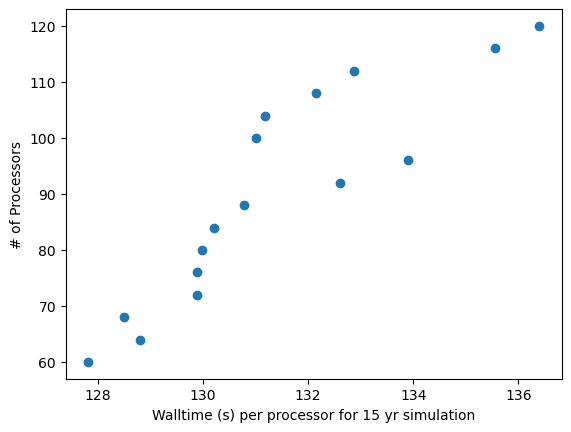

In [27]:
fig, ax = plt.subplots()

# mkr_dict = {'4': 'x', '8': '+', '12': 'o'}


scatter = ax.scatter(x=df.wtime*df.ntasks/3600, y=df.ntasks)
ax.set_xlabel('Walltime (s) per processor for 15 yr simulation')
ax.set_ylabel('# of Processors')

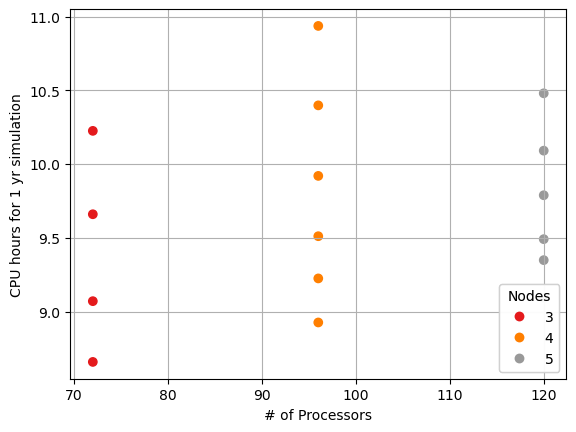

In [81]:
fig, ax = plt.subplots()
#ax.plot(df.wtime*df.ntasks/3600, df.ntasks, 'x')

scatter = ax.scatter(y=df.wtime*df.nodes*24/(15*3600), x=df.nodes*24, c=df.nodes, cmap='Set1')
ax.grid()
ax.set_ylabel('CPU hours for 1 yr simulation')
#ax.set_xlim([8,10])
#ax.set_ylim([48,144])
ax.set_xlabel('# of Processors')
legend = ax.legend(*scatter.legend_elements(),loc="lower right", title="Nodes")
ax.add_artist(legend)

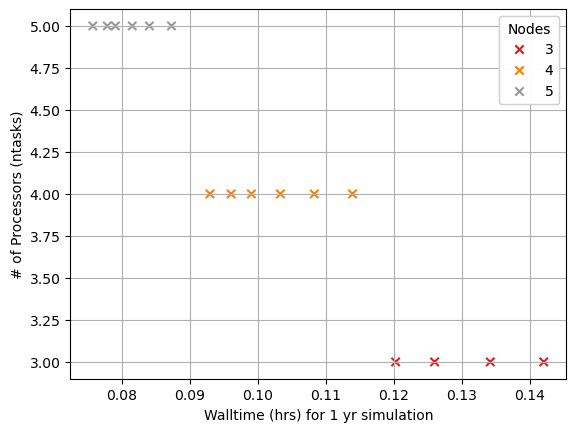

In [76]:
fig, ax = plt.subplots()

# mkr_dict = {'4': 'x', '8': '+', '12': 'o'}

scatter = ax.scatter(y=df.wtime/(3600*15), x=df.nasks, c=df.nodes, marker='x', cmap='Set1')
ax.set_xlabel('Walltime (days) per processor for 15 yr simulation')
ax.set_ylabel('# of Processors')
ax.grid()
ax.set_xlabel('Walltime (hrs) for 1 yr simulation')
ax.set_ylabel('# of Processors (ntasks)')
#ax.set_xlim([0,0.25])
#ax.set_ylim([48,144])
legend = ax.legend(*scatter.legend_elements(),loc="upper right", title="Nodes")
ax.add_artist(legend)

In [30]:
d = {'nodes': [1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6], 
     'nproc': [16, 2, 4, 8, 16, 1, 2, 4, 8, 16, 1, 2, 4, 8, 16, 1, 2, 4, 8, 16, 1],
     'mempc': [12, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
     'wtime': [19201, 10657, 10075, 10064, 10048, 8987, 6777, 6698, 6864, 6663, 7197, 5170, 5066, 5064, 5099, 5248, 4126, 4136, 4139, 4154, 4696]}

df = pd.DataFrame(data=d)

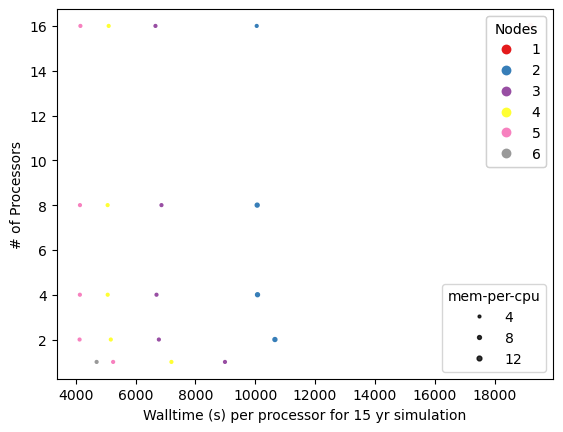

In [68]:
fig, ax = plt.subplots()

# mkr_dict = {'4': 'x', '8': '+', '12': 'o'}


scatter = ax.scatter(x=df.wtime, y=df.nproc, c=df.nodes, s=df.mempc, cmap='Set1')
ax.set_xlabel('Walltime (s) per processor for 15 yr simulation')
ax.set_ylabel('# of Processors')

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.8)
legend2 = ax.legend(handles, labels, loc="lower right", title="mem-per-cpu")

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),loc="upper right", title="Nodes")

ax.add_artist(legend)
ax.add_artist(legend2)

In [43]:
sim_test_period = 15
sim_act_period = 300

wtime_perproc_peryr = df.wtime/df.nproc/sim_test_period
wtime_total = wtime_perproc_peryr*df.nproc*sim_act_period # seconds
wtime_total_hrs = wtime_total/3600
wtime_total_days = wtime_total_hrs/24

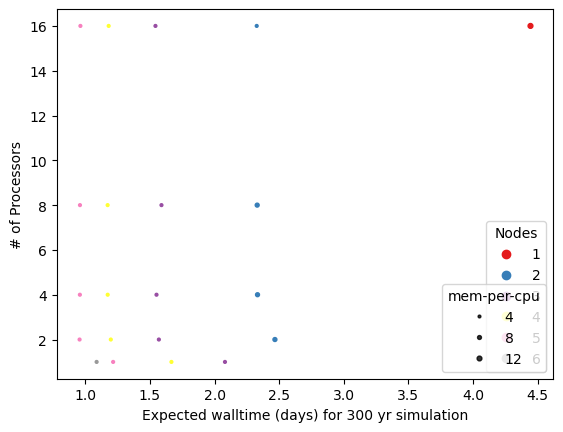

In [67]:
fig, ax = plt.subplots()

scatter = ax.scatter(x=wtime_total_days, y=df.nproc, c=df.nodes, cmap='Set1', s=df.mempc)
ax.set_xlabel('Expected walltime (days) for 300 yr simulation')
ax.set_ylabel('# of Processors')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Nodes")
ax.add_artist(legend)


handles, labels = scatter.legend_elements(prop="sizes", alpha=0.8)
legend2 = ax.legend(handles, labels, loc="lower right", title="mem-per-cpu")
